## Machine Learning Coursework - Exploratory Data Analysis
Dataset from UCI Repository: https://archive.ics.uci.edu/ml/datasets/Myocardial+infarction+complications

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('MI.csv')

Stripping whitespace from the left and right hand side of column headings

In [3]:
data.columns = data.columns.str.lstrip()
data.columns = data.columns.str.rstrip()

Replacing question mark with NaNs

In [4]:
data = data.replace('?',np.nan )

In [5]:
#pd.set_option('display.max_rows', 125)
data.isnull().sum()
#pd.set_option('display.max_rows', 10)

1. Record ID                                                0
2. Age                                                      8
3. Gender                                                   0
4. Quantity of myocardial infarctions in the anamnesis      4
5. Exertional angina pectoris in the anamnesis            106
                                                         ... 
120. Dressler syndrome                                      0
121. Chronic heart failure                                  0
122. Relapse of the myocardial infarction                   0
123. Post-infarction angina                                 0
124. Lethal outcome (cause)                                 0
Length: 124, dtype: int64

In [6]:
data.shape

(1700, 124)

Drop classifications that will not be used. Only the last column is used as we want to predict the likelihood of survival after three days from the MI incident

In [7]:
data.drop(['1. Record ID', 
           '113. Atrial fibrillation', 
           '114. Supraventricular tachycardia', 
           '115. Ventricular tachycardia', 
           '116. Ventricular fibrillation', 
           '117. Third-degree AV block', 
           '118. Pulmonary edema', 
           '119. Myocardial rupture', 
           '120. Dressler syndrome', 
           '121. Chronic heart failure', 
           '122. Relapse of the myocardial infarction', 
           '123. Post-infarction angina'], axis=1, inplace=True)

These colmns are dropped due to too many NaN values. They cannot be imputed as they might bias the results 

In [8]:
data.drop(['8. Heredity on CHD',
           '35. Systolic blood pressure according to Emergency Cardiology Team',
           '36. Diastolic blood pressure according to Emergency Cardiology Team',
           '89. Serum CPK content',
           '96. Use of opioid drugs by the Emergency Cardiology Team',
           '97. Use of NSAIDs by the Emergency Cardiology Team',
           '98.Use of lidocaine by the Emergency Cardiology Team'], axis=1, inplace=True)

Numerical continuous variables will have NaNs replaced with the mean of their columns

In [9]:
data['2. Age'] = pd.to_numeric(data['2. Age'])
data['37. Systolic blood pressure according to intensive care unit'] = pd.to_numeric(data['37. Systolic blood pressure according to intensive care unit'])
data['38. Diastolic blood pressure according to intensive care unit'] = pd.to_numeric(data['38. Diastolic blood pressure according to intensive care unit'])
data['84. Serum potassium content'] = pd.to_numeric(data['84. Serum potassium content'])
data['86. Serum sodium content'] = pd.to_numeric(data['86. Serum sodium content'])
data['87. Serum AlAT content'] = pd.to_numeric(data['87. Serum AlAT content'])
data['88. Serum AsAT content'] = pd.to_numeric(data['88. Serum AsAT content'])
data['90. White blood cell count (billions per liter)'] = pd.to_numeric(data['90. White blood cell count (billions per liter)'])
data['91. ESR (Erythrocyte sedimentation rate)'] = pd.to_numeric(data['91. ESR (Erythrocyte sedimentation rate)'])

In [10]:
mean_age = data['2. Age'].mean()
mean_sbp = data['37. Systolic blood pressure according to intensive care unit'].mean()
mean_dbp = data['38. Diastolic blood pressure according to intensive care unit'].mean()
mean_spc = data['84. Serum potassium content'].mean()
mean_ssc = data['86. Serum sodium content'].mean()
mean_alat = data['87. Serum AlAT content'].mean()
mean_asat = data['88. Serum AsAT content'].mean()
mean_wbc = data['90. White blood cell count (billions per liter)'].mean()
mean_esr = data['91. ESR (Erythrocyte sedimentation rate)'].mean()

In [11]:
data['2. Age'] = data['2. Age'].replace(np.nan, mean_age)
data['37. Systolic blood pressure according to intensive care unit'] = data['37. Systolic blood pressure according to intensive care unit'].replace(np.nan, mean_sbp)
data['38. Diastolic blood pressure according to intensive care unit'] = data['38. Diastolic blood pressure according to intensive care unit'].replace(np.nan, mean_dbp)
data['84. Serum potassium content'] = data['84. Serum potassium content'].replace(np.nan, mean_spc)
data['86. Serum sodium content'] = data['86. Serum sodium content'].replace(np.nan, mean_ssc)
data['87. Serum AlAT content'] = data['87. Serum AlAT content'].replace(np.nan, mean_alat)
data['88. Serum AsAT content'] = data['88. Serum AsAT content'].replace(np.nan, mean_asat)
data['90. White blood cell count (billions per liter)'] = data['90. White blood cell count (billions per liter)'].replace(np.nan, mean_wbc)
data['91. ESR (Erythrocyte sedimentation rate)'] = data['91. ESR (Erythrocyte sedimentation rate)'].replace(np.nan, mean_esr)

Drop the rows with NaNs. In this case, the variable is categorical and NaNs comprise more than 20 percent of the column. Imputing it with the mode might bias the variable so dropping any rows containing NaNs

In [12]:
data = data.dropna(subset = ['85 Increase of sodium in serum (more than 150 mmol/L)'])

Finding the mode of all categorical columns and imputing the NaNs with the mode. The NaNs in variables here is less than 15% of its total so risk of bias is not that high 

In [13]:
# Preparing index which contains location of categorical and continuous variables
index = [*range(1, 32)]
index.extend([*range(34, 79)])
index.append(80)
index.extend([*range(86, 104)])

In [14]:
# Create list containing modes of all cat columns
mode = []

for ind in index:
    series = data.iloc[:,ind]
    mode.append(series.mode()[0])

In [15]:
col_names = data.columns.to_list()

col_names_mod = []

for idx in index:
    col_names_mod.append(col_names[idx])

In [16]:
# Locate categorical columns and impute
for idx, col_name in enumerate(col_names_mod):
    data[col_name].fillna(mode[idx], inplace = True)

In [17]:
#pd.set_option('display.max_rows', 125)
data.isnull().sum()
#pd.set_option('display.max_rows', 10)

2. Age                                                     0
3. Gender                                                  0
4. Quantity of myocardial infarctions in the anamnesis     0
5. Exertional angina pectoris in the anamnesis             0
6. Functional class of angina pectoris in the last year    0
                                                          ..
109. Use of а anticoagulants (heparin) in the ICU          0
110. Use of acetylsalicylic acid in the ICU                0
111. Use of Ticlid in the ICU                              0
112. Use of Trental in the ICU                             0
124. Lethal outcome (cause)                                0
Length: 105, dtype: int64

In [18]:
data.shape

(1325, 105)

Convert all values from string to numerical values

In [19]:
data = data.apply(pd.to_numeric)

In [20]:
data.describe()

,2. Age,3. Gender,4. Quantity of myocardial infarctions in the anamnesis,5. Exertional angina pectoris in the anamnesis,6. Functional class of angina pectoris in the last year,"7. Coronary heart disease in recent weeks, days before admission to hospital",9. Presence of an essential hypertension (GB),10. Symptomatic hypertension,11. Duration of arterial hypertension,12. Presence of chronic Heart failure (HF) in the anamnesis,...,104. Use of NSAIDs in the ICU in the second day of the hospital period,105. Use of NSAIDs in the ICU in the third day of the hospital period,106. Use of lidocaine in the ICU,107. Use of beta-blockers in the ICU,108. Use of calcium channel blockers in the ICU,109. Use of а anticoagulants (heparin) in the ICU,110. Use of acetylsalicylic acid in the ICU,111. Use of Ticlid in the ICU,112. Use of Trental in the ICU,124. Lethal outcome (cause)
count,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,...,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000
mean,61.502749,0.629434,0.527547,2.075472,1.179623,1.151698,1.411321,0.033962,2.901132,0.172830,...,0.107925,0.080755,0.306415,0.124528,0.677736,0.751698,0.759245,0.018113,0.217358,0.448302
std,11.405811,0.483139,0.817226,2.408829,1.032424,0.810854,1.089926,0.181200,3.090289,0.622721,...,0.386290,0.350183,0.461178,0.330308,0.467520,0.432191,0.427703,0.133411,0.412604,1.351878
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,62.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,69.000000,1.000000,1.000000,5.000000,2.000000,2.000000,2.000000,0.000000,7.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,3.000000,1.000000,7.000000,4.000000,...,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Classification labels are from 0 to 7. Adding one to them to make it easier for processing

In [21]:
data['124. Lethal outcome (cause)'] += 1

Class distribution. Minority classes have very less data, so data is severely unbalanced. Will be challenging to analyse 

In [22]:
from collections import Counter

print(sorted(Counter(data['124. Lethal outcome (cause)']).items()))

[(1, 1135), (2, 71), (3, 8), (4, 43), (5, 20), (6, 9), (7, 20), (8, 19)]


In [23]:
data.to_csv('data_mi.csv', index = False)

In [24]:
data

,2. Age,3. Gender,4. Quantity of myocardial infarctions in the anamnesis,5. Exertional angina pectoris in the anamnesis,6. Functional class of angina pectoris in the last year,"7. Coronary heart disease in recent weeks, days before admission to hospital",9. Presence of an essential hypertension (GB),10. Symptomatic hypertension,11. Duration of arterial hypertension,12. Presence of chronic Heart failure (HF) in the anamnesis,...,104. Use of NSAIDs in the ICU in the second day of the hospital period,105. Use of NSAIDs in the ICU in the third day of the hospital period,106. Use of lidocaine in the ICU,107. Use of beta-blockers in the ICU,108. Use of calcium channel blockers in the ICU,109. Use of а anticoagulants (heparin) in the ICU,110. Use of acetylsalicylic acid in the ICU,111. Use of Ticlid in the ICU,112. Use of Trental in the ICU,124. Lethal outcome (cause)
0,77.0,1,2,1,1,2,3,0,7,0,...,0,0,1,0,0,1,1,0,0,1
1,55.0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,1,1,0,1,1
2,52.0,1,0,0,0,2,2,0,2,0,...,2,2,1,1,0,1,1,0,0,1
3,68.0,0,0,0,0,2,2,0,3,1,...,0,0,0,0,1,1,1,0,0,1
4,60.0,1,0,0,0,2,3,0,7,0,...,0,0,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,62.0,1,0,0,0,0,0,1,7,0,...,0,0,1,0,1,1,1,0,0,4
1692,71.0,0,0,6,2,2,2,0,7,0,...,0,0,0,1,1,1,1,0,0,4
1694,77.0,0,0,0,0,0,2,0,7,0,...,1,0,0,0,1,1,0,0,0,4
1695,77.0,0,0,4,2,1,2,0,7,0,...,0,0,0,0,0,0,0,0,0,4


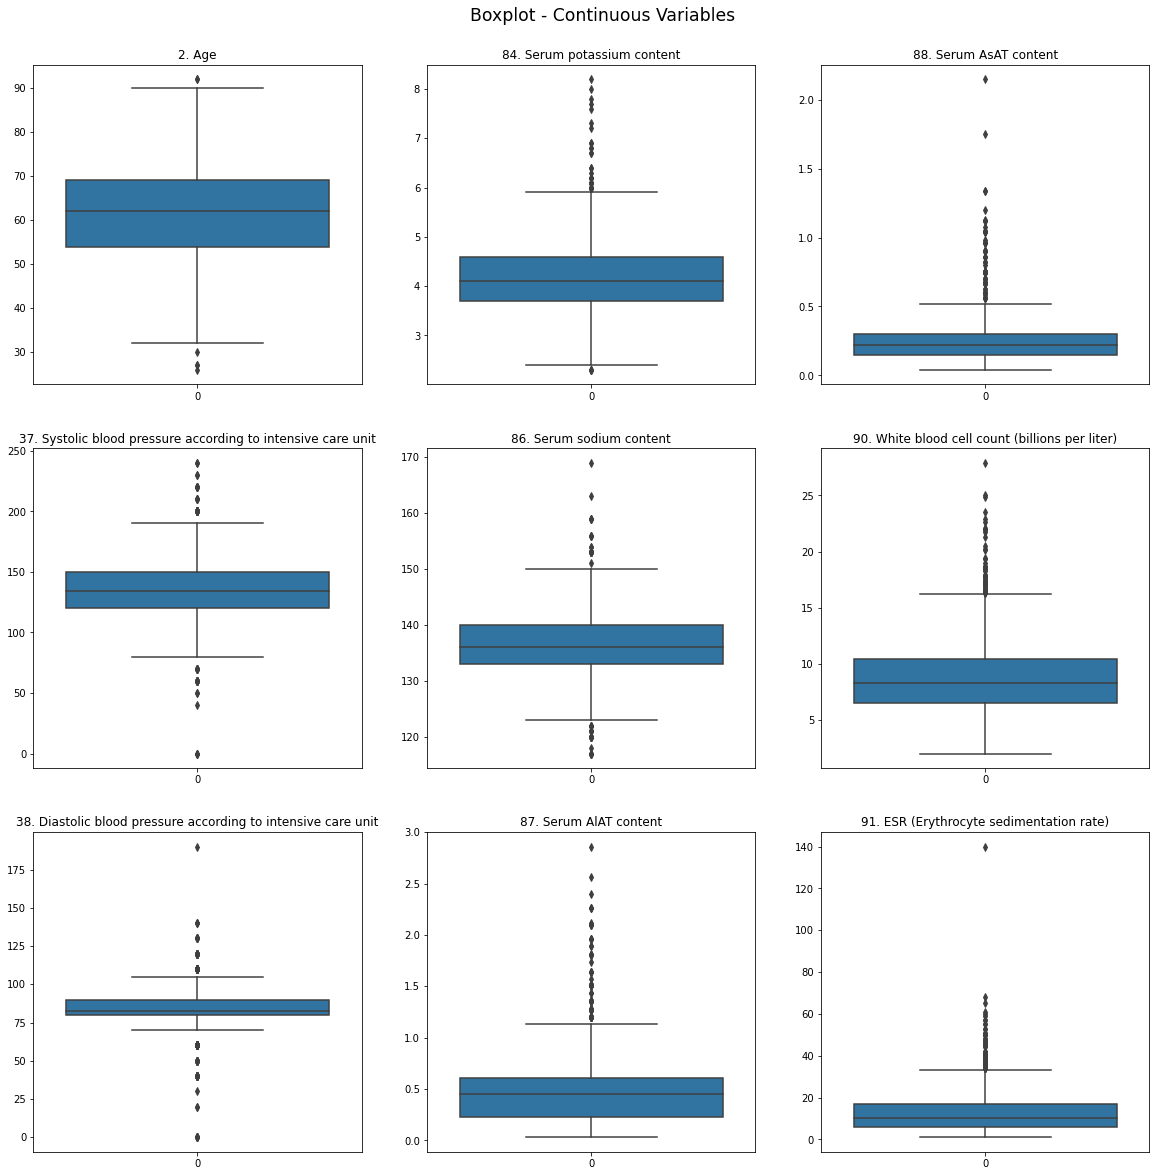

In [25]:
import seaborn as sns

hist_cols = ['2. Age', 
             '37. Systolic blood pressure according to intensive care unit', 
             '38. Diastolic blood pressure according to intensive care unit', 
             '84. Serum potassium content', 
             '86. Serum sodium content', 
             '87. Serum AlAT content', 
             '88. Serum AsAT content', 
             '90. White blood cell count (billions per liter)', 
             '91. ESR (Erythrocyte sedimentation rate)']

fig, axs = plt.subplots(3, 3, figsize=(20, 20))

x = 0
y = 0

for heading in hist_cols:
    sns.boxplot(data=data[heading], ax=axs[x, y]).set(title=heading)
    x += 1
    if x == 3:
        y += 1
        x = 0      

fig.suptitle("Boxplot - Continuous Variables", x = 0.52, y = 0.92, fontsize = 'xx-large')
plt.show()

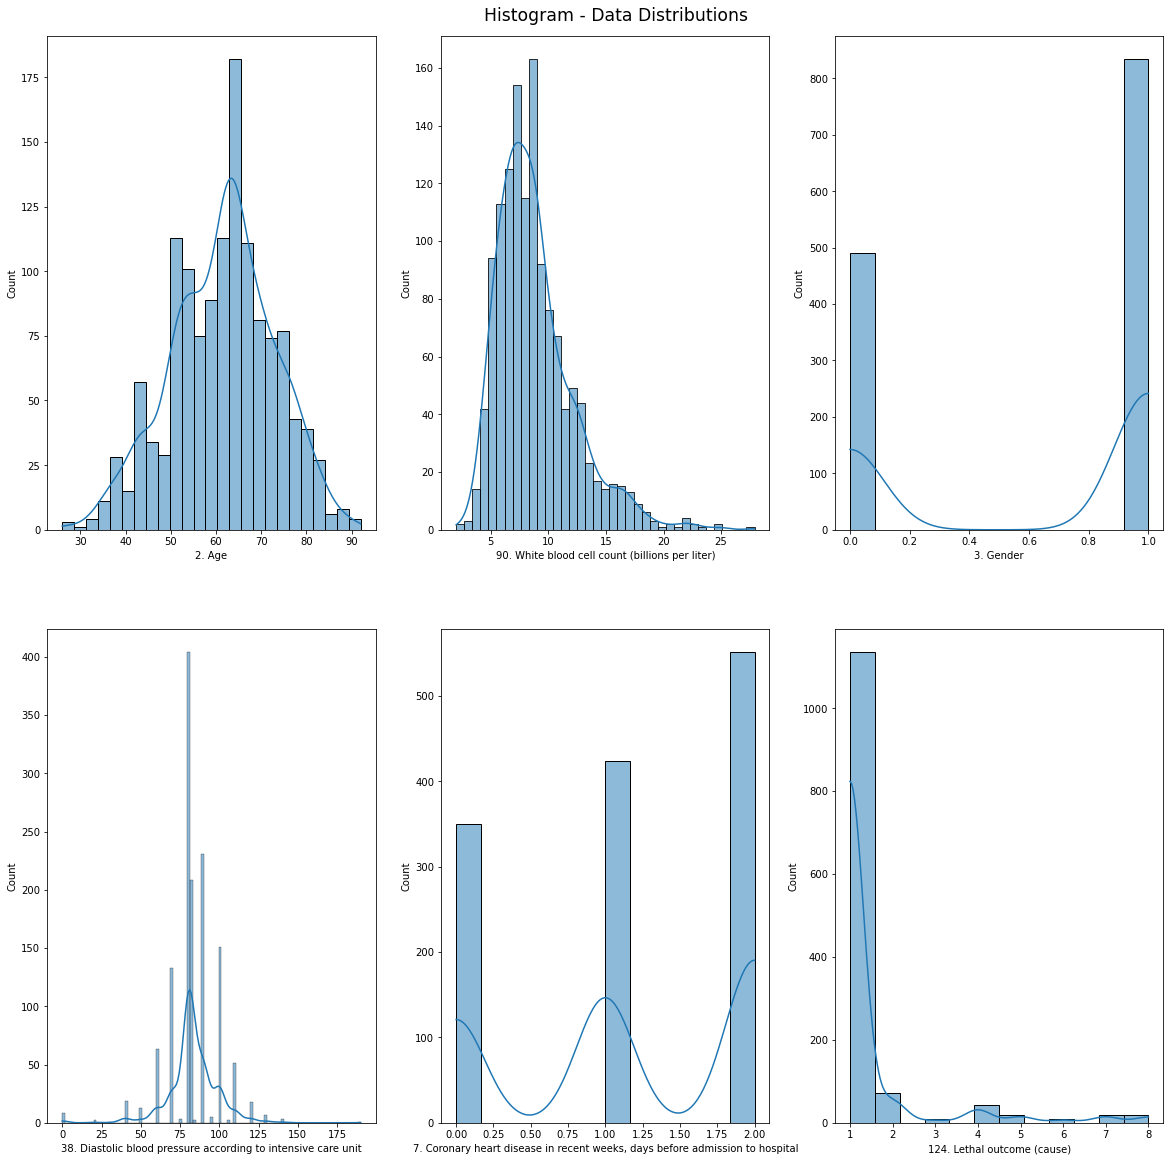

In [26]:
hist_cols = ['2. Age', '38. Diastolic blood pressure according to intensive care unit', 
            '90. White blood cell count (billions per liter)', '7. Coronary heart disease in recent weeks, days before admission to hospital', 
            '3. Gender', '124. Lethal outcome (cause)']

fig, axs = plt.subplots(2, 3, figsize=(20, 20))

x = 0
y = 0

for heading in hist_cols:
    sns.histplot(data=data[heading], kde=True, ax=axs[x, y])
    x += 1
    if x == 2:
        y += 1
        x = 0      

fig.suptitle("Histogram - Data Distributions", x = 0.52, y = 0.9, fontsize = 'xx-large')
plt.show()

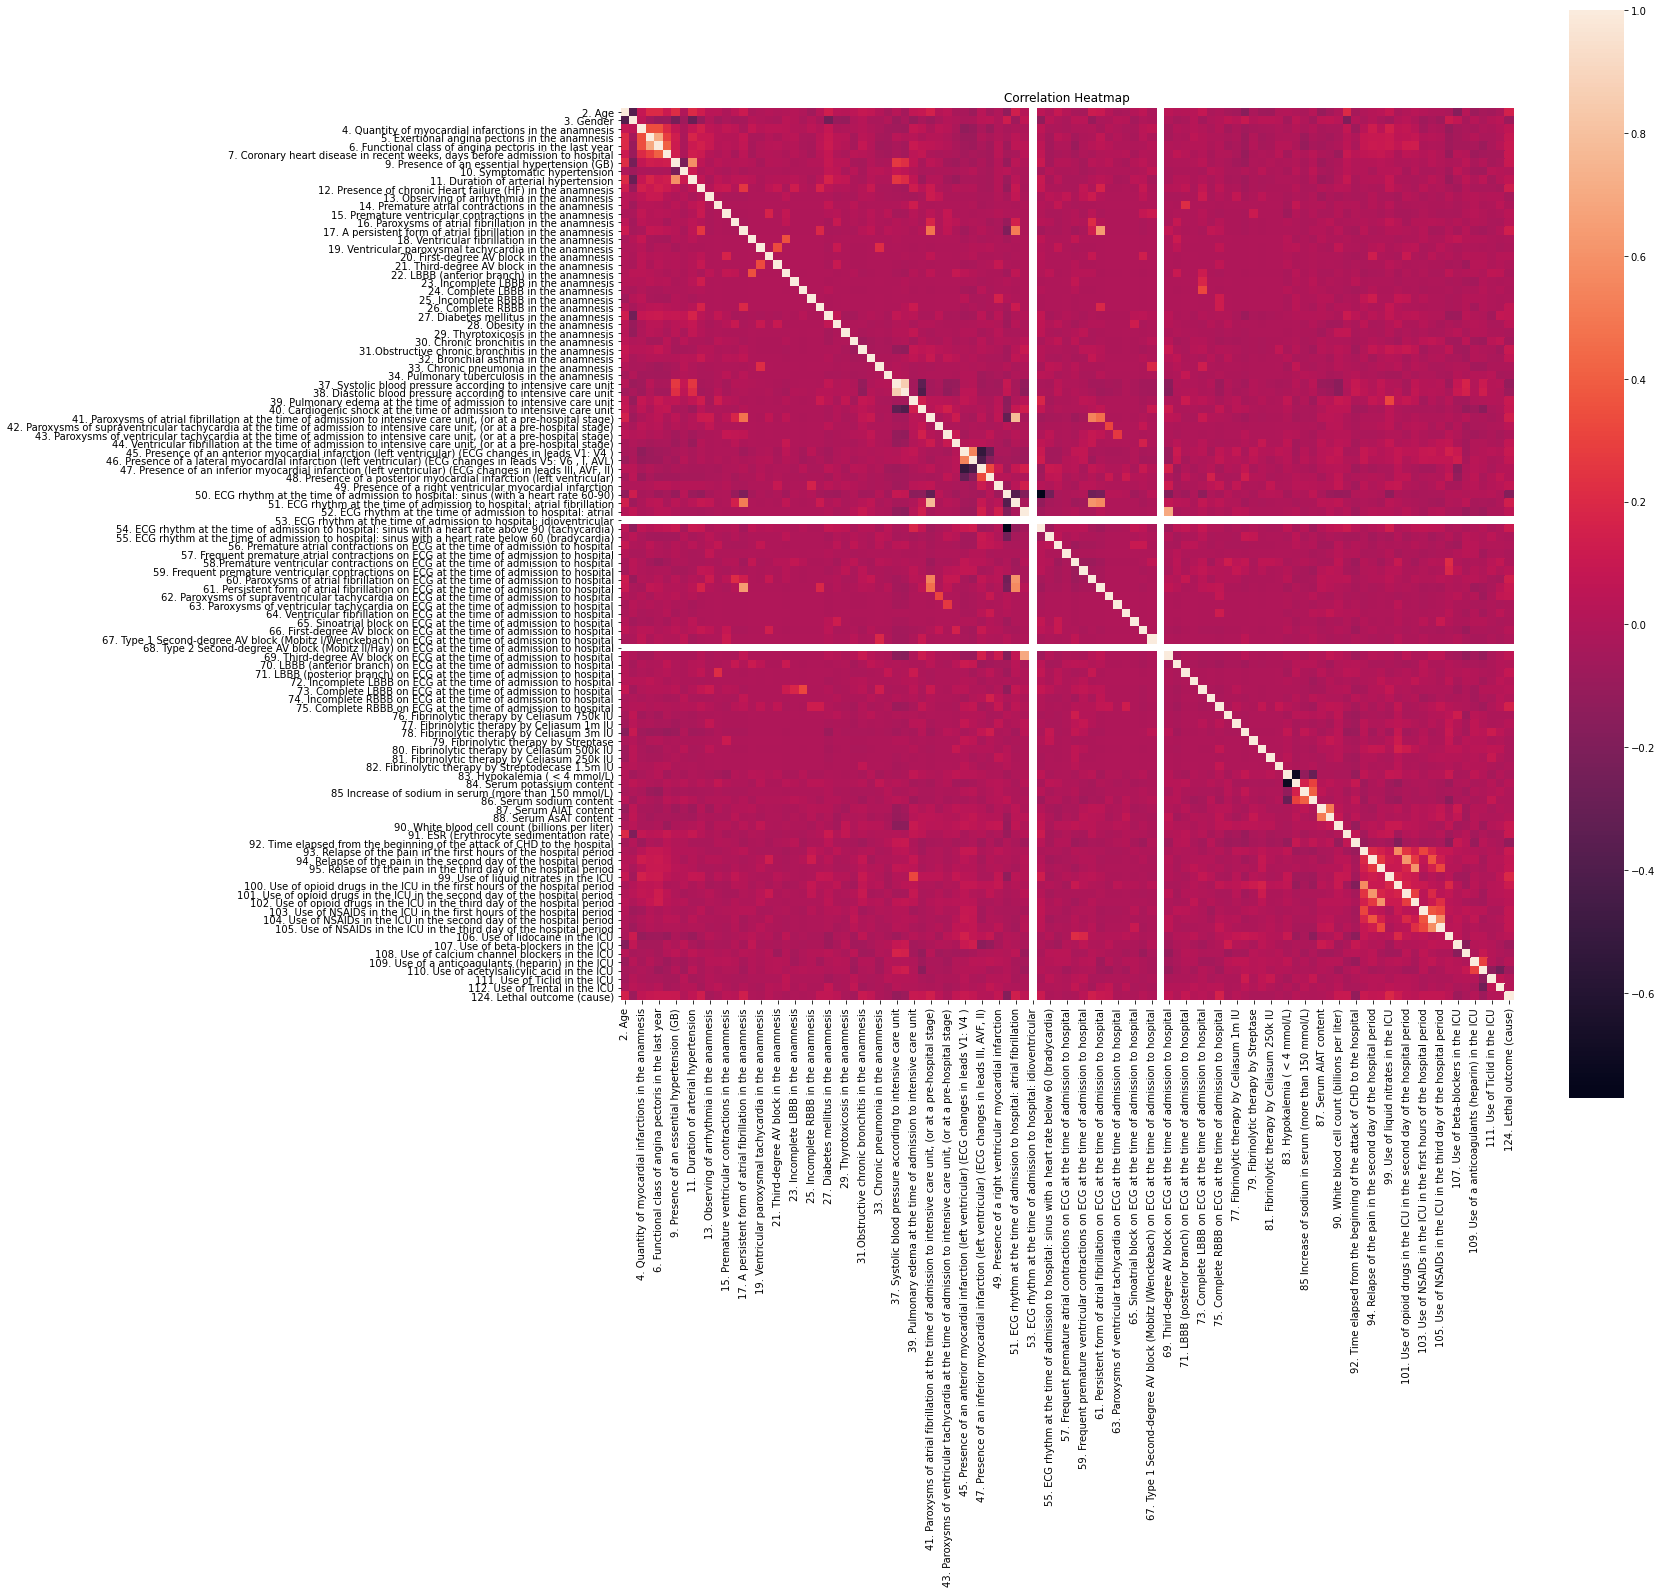

In [27]:
corr = data.corr()

plt.figure(figsize = (20,20))
ax = sns.heatmap(corr, square=True)
ax.set_title("Correlation Heatmap")
plt.show()

Standardise numerical continuous variables

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct_data = ColumnTransformer([
        ('somename', StandardScaler(), ['2. Age', 
                                        '37. Systolic blood pressure according to intensive care unit', 
                                        '38. Diastolic blood pressure according to intensive care unit', 
                                        '84. Serum potassium content', 
                                        '86. Serum sodium content', 
                                        '87. Serum AlAT content', 
                                        '88. Serum AsAT content', 
                                        '90. White blood cell count (billions per liter)', 
                                        '91. ESR (Erythrocyte sedimentation rate)'])], remainder='passthrough')

data_scaled = ct_data.fit_transform(data)

In [29]:
numer_cols_names = ['2. Age', 
                    '37. Systolic blood pressure according to intensive care unit', 
                    '38. Diastolic blood pressure according to intensive care unit', 
                    '84. Serum potassium content', 
                    '86. Serum sodium content', 
                    '87. Serum AlAT content', 
                    '88. Serum AsAT content', 
                    '90. White blood cell count (billions per liter)', 
                    '91. ESR (Erythrocyte sedimentation rate)']

revised_col_names = []

revised_col_names.extend(numer_cols_names)

col_names_mod = col_names.copy()

for item in numer_cols_names:
    col_names_mod.remove(item)
   
revised_col_names.extend(col_names_mod)   

In [30]:
df_data_scaled = pd.DataFrame(data=data_scaled, columns=revised_col_names)

Exporting imbalanced but scaled data

In [31]:
df_data_scaled.to_csv('data_mi_scaled.csv', index=False)

Balancing the dataset using SMOTE. Splitting the dataset into training and testing dataset at a 75/25 split so that SMOTE is not applied to the testing data

In [32]:
data_attr = data_scaled[:,:-1]
data_lbls = data_scaled[:, -1]

In [33]:
data_attr.shape, data_lbls.shape

((1325, 104), (1325,))

In [34]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(data_attr, data_lbls, test_size = 0.25, train_size = 0.75, random_state = 42)

Initially oversampling the data because there is not enough data to support the minority classification. Then applying SMOTE and undersampling as recommended in the SMOTE paper. Only taking 250 samples from each class to keep dataset size manageable

In [35]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

pipe = Pipeline([('ros', RandomOverSampler(sampling_strategy = {2: 170, 3: 170, 4: 170, 5: 170, 6: 170, 7: 170, 8: 170})), 
                 ('oversampler', SMOTE()), 
                 ('undersampler', RandomUnderSampler(sampling_strategy = {1: 250, 2: 250, 3: 250, 4: 250, 5: 250, 6: 250, 7: 250, 8: 250}))
                ])

x_smote_sampled, y_smote_sampled = pipe.fit_resample(x_train, y_train)

In [36]:
from collections import Counter

print(sorted(Counter(y_smote_sampled).items()))

[(1.0, 250), (2.0, 250), (3.0, 250), (4.0, 250), (5.0, 250), (6.0, 250), (7.0, 250), (8.0, 250)]


In [37]:
data_train_scaled_smote = np.c_[x_smote_sampled, y_smote_sampled]

In [38]:
data_train_scaled_smote.shape

(2000, 105)

In [39]:
df_data_train_scaled_smote = pd.DataFrame(data=data_train_scaled_smote, columns=revised_col_names)

In [40]:
data_test_scaled = np.c_[x_test, y_test]

In [41]:
data_test_scaled.shape

(332, 105)

In [42]:
df_data_test_scaled = pd.DataFrame(data=data_test_scaled, columns=revised_col_names)

Export balanced and scaled dataset, one for training and the other for testing

In [43]:
df_data_train_scaled_smote.to_csv('data_train_scaled_smote.csv', index=False)
df_data_test_scaled.to_csv('data_test_scaled.csv', index=False)